In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

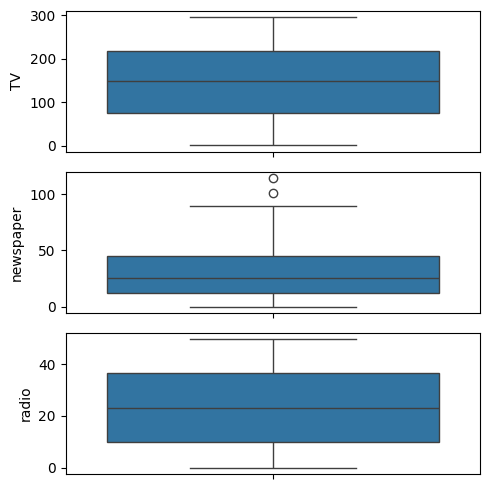

In [8]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1= sns.boxplot(df['TV'], ax=axs[0])
plt2= sns.boxplot(df['newspaper'], ax=axs[1])
plt3= sns.boxplot(df['radio'], ax=axs[2])
plt.tight_layout()


<Axes: xlabel='newspaper', ylabel='Density'>

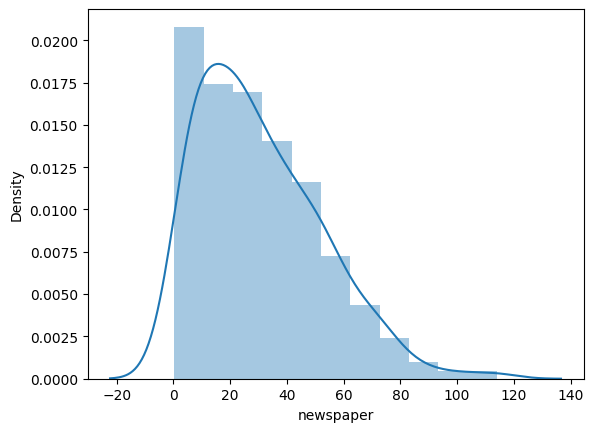

In [9]:
sns.distplot(df["newspaper"])

In [10]:
iqr=df.newspaper.quantile(0.75)-df.newspaper.quantile(0.25)

In [11]:
lower_bridge=df['newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [12]:
data=df.copy()

In [13]:
data.loc[data['newspaper']>=93, 'newspaper']=93

<Axes: ylabel='newspaper'>

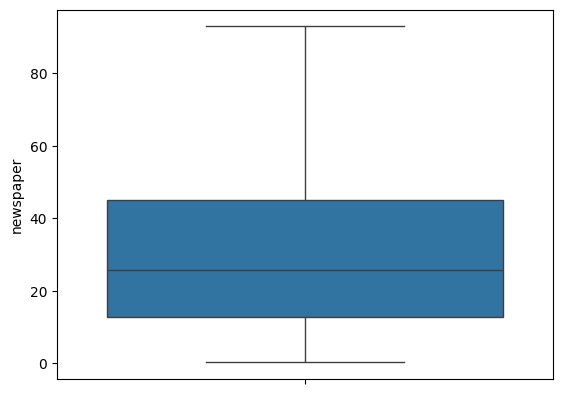

In [14]:
sns.boxplot(data["newspaper"])

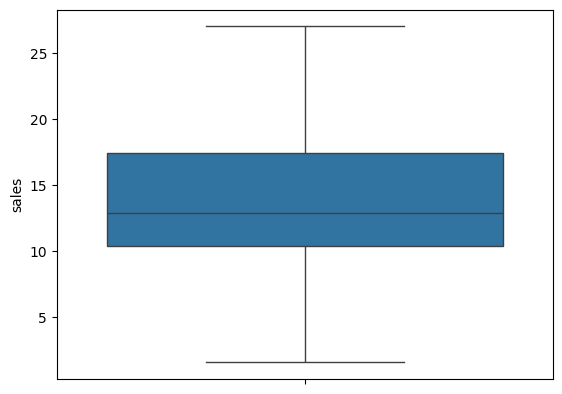

In [15]:
sns.boxplot(data['sales']);

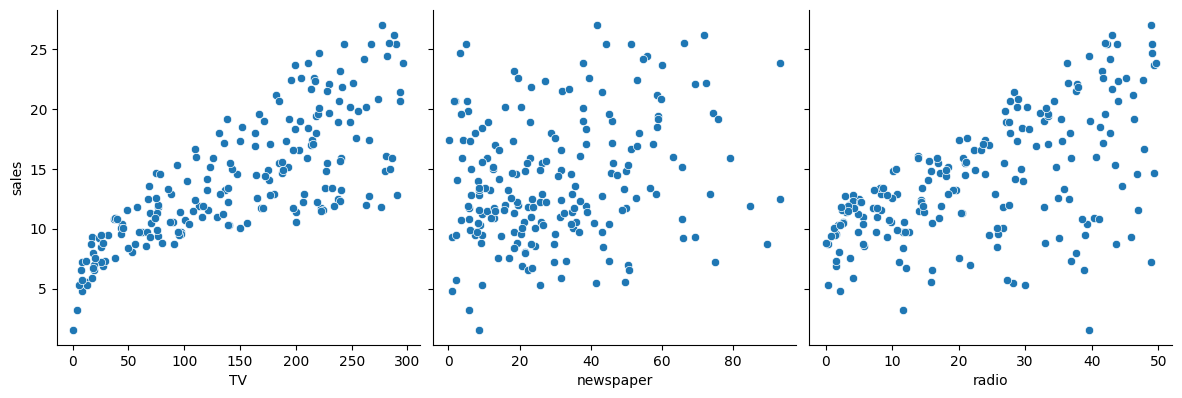

In [16]:
sns.pairplot(data, x_vars=['TV', 'newspaper', 'radio'],
             y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

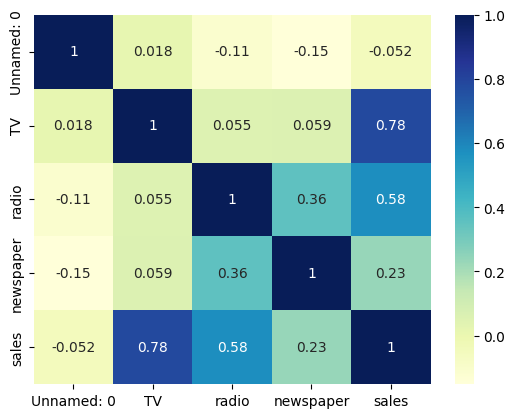

In [17]:
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

In [18]:
important_features=list(df.corr()['sales'][(df.corr()['sales']>+0.5)|(df.corr()['sales']<-0.5)].index)

In [19]:
print(important_features)

['TV', 'radio', 'sales']


In [20]:
x=data['TV']
y=data['sales']

In [21]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [22]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [23]:
print(x.shape,y.shape)

(200,) (200,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [25]:
print(x_train.shape,y_train.shape)

(134,) (134,)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
x_train_reshaped = np.reshape(x_train.values, (-1, 1))
x_test_reshaped = x_test.values.reshape(-1, 1)

In [28]:
knn=KNeighborsRegressor().fit(x_train_reshaped, y_train)
knn

KNeighborsRegressor()

In [29]:
knn_train_pred=knn.predict(x_train_reshaped)

In [30]:
knn_test_pred=knn.predict(x_test_reshaped)

In [31]:
print(knn_train_pred, knn_test_pred)

[16.52 12.9   7.72 15.46 10.98 11.14 17.9   8.28  7.18 17.54 11.42 15.36
  9.26 18.82 10.94 11.62  7.18  7.18 17.78 15.1  17.54 10.22 16.52 12.92
 19.78 12.56  9.66  7.72 14.82 18.3   9.18 11.08 16.4   5.96 16.34 17.04
  5.96 10.98 19.78 16.64 17.96 17.48 18.34 17.78 14.04 13.28 14.04 16.86
 19.78 18.3  11.78 12.98  7.38 18.34 11.22  9.62 10.22 19.62 13.28 15.1
  9.8  15.14 15.92 16.86 12.92 15.14 11.14 15.14 11.42 16.52 12.92 10.98
 15.14  9.78 10.66 10.82 17.04 18.3  14.66 14.66  9.64 19.02 10.46  9.32
  5.96 17.72 18.34 11.22 17.78 13.26 11.22 12.92 12.98  9.64 11.42 18.3
  8.28 11.42 19.78 18.82 16.28  8.86 18.34 14.66  5.96 12.9  18.3  16.86
 13.78  4.52 15.1   7.18 18.82 17.04  4.52 12.6  18.34 14.66 15.1  11.1
 16.64 14.82 11.22 18.3  18.98 17.54 17.72 16.28  5.96  9.78 11.42  7.72
  7.34 16.34] [12.98 18.22 18.82  7.34 17.08 12.6  10.98 21.2  18.22  8.86 12.92 13.3
 16.16 17.78  8.86 17.72 12.6  18.82 16.38  8.28 17.04 12.6  17.78 19.68
 16.84  5.98 18.9  18.   17.68  5.16 18.3

In [32]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2""Test RMSE","Variance"])

In [33]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5325612534333353
RMSE: 3.6321852509157204


In [34]:
Results.head()

,Model,Train R2,Test R2Test RMSE,Variance,Test R2,Test RMSE,variance
0,K-Nearest Neighbors,0.643538,NaN,NaN,0.532561,3.632185,0.110977


In [35]:
svr=SVR().fit(x_train_reshaped,y_train)
svr

SVR()

In [36]:
svr_train_pred=svr.predict(x_train_reshaped)
svr_test_pred=svr.predict(x_test_reshaped)

In [37]:
print(svr_train_pred,svr_test_pred)

[16.88984344 12.42703114  7.87930617 16.77938402 10.29436367 11.45362068
 16.52537646  8.17581367  7.93428992 15.88015446 10.61162751 17.02899885
  9.37061256 16.71362631 11.44092057 11.29190223  7.95561497  7.9628068
 16.22502769 13.85894217 15.88015446 11.59275579 16.81558867 13.45272853
 17.32377226 12.14773246  8.71074279  7.86930939 15.2183251  17.5114699
  8.45523487 11.71444767 16.9900454   7.63787503 16.49981916 14.72603313
  7.63104285 10.26534412 17.31875407 16.05871338 17.58974092 17.16101483
 17.21369154 16.06680522 13.08426683 13.55257323 12.9761799  17.58471538
 17.27164575 17.47954345 10.39992669 12.80551678  7.90301937 17.24993871
 11.08863035  9.54989879 11.58014302 17.49992674 13.63328909 14.07897439
  9.09978266 16.5581236  15.0927341  17.58105374 13.46265978 16.56699293
 11.53805482 16.59781918 10.6717236  16.88601065 12.00818131 10.2216344
 16.59781918  8.838417   10.84473133 10.18260284 14.90661295 17.44052409
 15.39213899 15.3596558   9.01365113 16.59624836  9.99

In [38]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5131223034119103
RMSE: 3.706940168337255


In [39]:
Results.head()

,Model,Train R2,Test R2Test RMSE,Variance,Test R2,Test RMSE,variance
0,K-Nearest Neighbors,0.643538,NaN,NaN,0.532561,3.632185,0.110977
1,Support Vector Machine,0.589520,NaN,NaN,0.513122,3.706940,0.076398


In [40]:
import statsmodels.api as sm

In [41]:
x_train_constant=sm.add_constant(x_train)

In [42]:
model=sm.OLS(y_train, x_train_constant).fit()

In [43]:
model.params

const    7.043069
TV       0.046977
dtype: float64

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     201.4
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           2.47e-28
Time:                        06:40:38   Log-Likelihood:                -346.46
No. Observations:                 134   AIC:                             696.9
Df Residuals:                     132   BIC:                             702.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0431      0.541     13.011      0.0

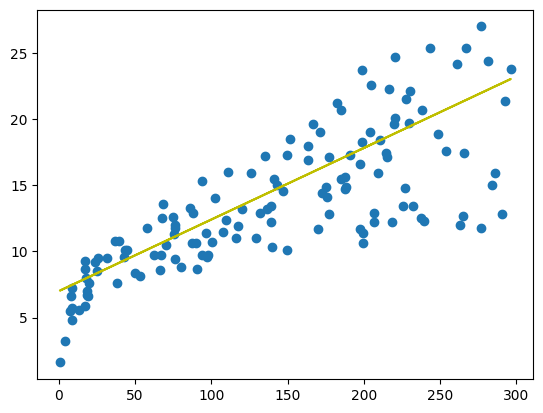

In [45]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955+0.0541*x_train,"y")
plt.show()

In [46]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

43    -3.862617
164   -0.648777
192   -1.951074
14     2.368918
83     3.343702
         ...   
195   -1.237592
80     1.167886
2      1.448926
22    -2.063166
152    0.274269
Length: 134, dtype: float64

In [47]:
y_train_pred

43     16.762617
164    12.548777
192     7.851074
14     16.631082
83     10.256298
         ...    
195     8.837592
80     10.632114
2       7.851074
22      7.663166
152    16.325731
Length: 134, dtype: float64

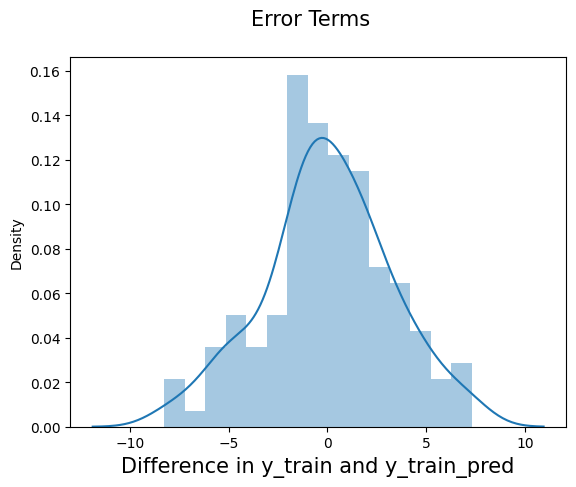

In [48]:
fig=plt.figure()
sns.distplot(res, bins=15)
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel("Difference in y_train and y_train_pred", fontsize=15)
plt.show()

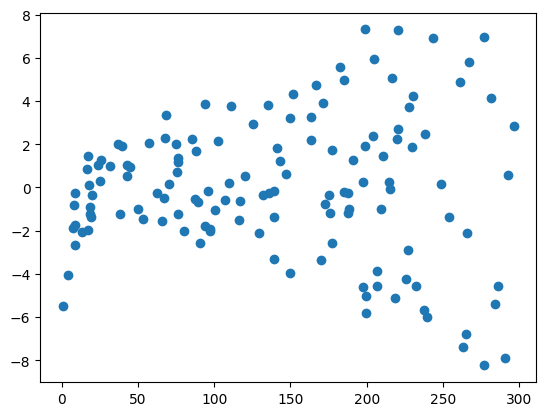

In [49]:
plt.scatter(x_train,res)
plt.show()

In [50]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [51]:
y_pred

89     12.201147
84     17.072666
102    20.206034
108     7.658468
109    19.041004
         ...    
15     16.222382
182     9.683178
85     16.119032
183    20.553664
58     16.945828
Length: 66, dtype: float64